In [5]:
import numpy as np
import tensorflow as tf
import math, os, sys, datetime
from pandas_datareader import data as pdr
from datetime import date, timedelta
import yfinance as yf
yf.pdr_override()
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
from ta import add_all_ta_features
from ta.utils import dropna
# Tickers list
# We can add and delete any ticker from the list to get desired ticker live data
# tickers=['AAPL','AMZN','FB','GOOG','MMM','MSFT','NFLX','NKE','NVDA','INTC','CSCO','WMT','TSLA','EBAY',
#         'ORCL','CBG.BK','OSP.BK','BBL.BK','SCB.BK','LH.BK','MINT.BK','PTT.BK','BANPU.BK','ADVANC.BK',
#          'TRUE.BK','AOT.BK','BEM.BK','BTS.BK','CPALL.BK','CPN.BK']
tickers=['FB']
# tickers=['AAPL','AMZN','FB','GOOG','MMM','MSFT','NFLX','NKE','NVDA','INTC','CSCO','WMT','TSLA','EBAY',
#          'ORCL','CBG.BK','OSP.BK','BBL.BK','SCB.BK','LH.BK','MINT.BK','PTT.BK','BANPU.BK','ADVANC.BK',
#          'TRUE.BK','AOT.BK','BEM.BK','BTS.BK','CPALL.BK','CPN.BK']

startdate = datetime.datetime(2017, 1, 13)
enddate = datetime.datetime(2021, 1, 1)


In [6]:
all_data = pd.DataFrame()  
for stocks in tickers:
    ticker = yf.Ticker(stocks)
    data = ticker.history(start=startdate, end=enddate)
    data.insert(0, 'ticker', stocks)
    data['next_Close'] = data['Close'].shift(-7)
    data = data.drop(columns=['Dividends', 'Stock Splits'])
    data = dropna(data)
    data = add_all_ta_features(data, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)
    data = data.drop(columns=['Volume', 'Open', 'High', 'Low'])

    all_data = all_data.append(data)
data = all_data

D:\Program Files\anaconda3\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
D:\Program Files\anaconda3\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


In [9]:
data.columns[2:]

Index(['next_Close', 'volume_adi', 'volume_obv', 'volume_cmf', 'volume_fi',
       'volume_mfi', 'volume_em', 'volume_sma_em', 'volume_vpt', 'volume_nvi',
       'volume_vwap', 'volatility_atr', 'volatility_bbm', 'volatility_bbh',
       'volatility_bbl', 'volatility_bbw', 'volatility_bbp', 'volatility_bbhi',
       'volatility_bbli', 'volatility_kcc', 'volatility_kch', 'volatility_kcl',
       'volatility_kcw', 'volatility_kcp', 'volatility_kchi',
       'volatility_kcli', 'volatility_dcl', 'volatility_dch', 'volatility_dcm',
       'volatility_dcw', 'volatility_dcp', 'volatility_ui', 'trend_macd',
       'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast',
       'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow', 'trend_adx',
       'trend_adx_pos', 'trend_adx_neg', 'trend_vortex_ind_pos',
       'trend_vortex_ind_neg', 'trend_vortex_ind_diff', 'trend_trix',
       'trend_mass_index', 'trend_cci', 'trend_dpo', 'trend_kst',
       'trend_kst_sig', 'trend_kst_diff', 'trend_ichi

In [3]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
X = data.iloc[:,2:] #independent columns
y = data['next_Close'] #target column i.e price range


In [23]:
# data[data.columns[7:]].corr()['pct_change'][:]
featureScores = pd.DataFrame(data[data.columns[2:]].corr()['next_Close'][:])
featureScores.sort_values(by=['next_Close'])

,next_Close
trend_adx,-0.217971
trend_dpo,-0.146596
trend_aroon_down,-0.121735
momentum_ppo_signal,-0.114383
volatility_bbli,-0.099810
momentum_ppo,-0.086923
volatility_kcli,-0.071401
trend_kst_diff,-0.060911
volume_cmf,-0.044501
trend_adx_neg,-0.038240


In [10]:
x_list = []
for i in range(0, len(featureScores)):
    if abs(featureScores.next_Close[i]) > 0.90:
       x_list.append(featureScores.index[i])
X = data[x_list]
X = X.drop(columns=['next_Close'])

In [11]:
X

,volume_adi,volume_nvi,volume_vwap,volatility_bbm,volatility_bbh,volatility_bbl,volatility_kcc,volatility_kch,volatility_kcl,volatility_dcl,volatility_dch,volatility_dcm,trend_sma_fast,trend_sma_slow,trend_ema_fast,trend_ema_slow,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_psar_up,trend_psar_down,momentum_kama,others_cr
Date,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-12,9.840434e+07,1000.000000,28.067142,28.145027,28.145027,28.145027,28.067142,28.324401,27.809882,27.899569,28.156829,28.028199,28.145027,28.145027,28.145027,28.145027,28.028199,28.028199,28.028199,28.028199,55.684479,54.133594,-1.000000,-1.000000,28.145027,0.000000
2017-01-13,5.327315e+07,998.238898,28.094557,28.120244,28.169810,28.070678,28.095069,28.319286,27.870852,27.899569,28.232351,28.065960,28.120244,28.120244,28.137402,28.141356,28.065960,28.065960,28.065960,28.065960,55.684479,54.133594,-1.000000,-1.000000,28.125489,-0.176110
2017-01-17,1.582977e+08,998.238898,28.136342,28.187510,28.382022,27.992997,28.130341,28.438737,27.821945,27.899569,28.378684,28.139127,28.187510,28.187510,28.165808,28.154740,28.139127,28.139127,28.139127,28.139127,55.684479,54.133594,-1.000000,28.156829,28.204487,0.628933
2017-01-18,1.306822e+08,998.155604,28.179238,28.220551,28.424212,28.016891,28.182199,28.460109,27.904288,27.899569,28.440047,28.169808,28.220551,28.220551,28.189480,28.166957,28.169808,28.169808,28.169808,28.169808,55.684479,54.133594,27.901931,28.156829,28.250059,0.620537
2017-01-19,1.449028e+08,998.155604,28.194754,28.230465,28.416890,28.044039,28.198209,28.454524,27.941895,27.899569,28.440047,28.169808,28.230465,28.230465,28.201886,28.174599,28.169808,28.169808,28.169808,28.169808,55.684479,54.133594,27.901931,28.156829,28.257900,0.444453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-15,7.298032e+09,4807.344564,121.689212,120.131130,127.121514,113.140746,122.748101,125.345801,120.150400,112.231370,127.492604,119.861987,122.546745,119.650358,122.210916,120.162270,123.629950,119.861987,121.745969,117.143262,114.349197,119.949108,118.612755,121.050397,121.283698,352.913629
2020-12-16,7.335470e+09,4804.713314,122.417890,120.550789,128.198351,112.903227,123.259799,125.790713,120.728886,112.231370,127.961107,120.096238,123.274419,120.090874,123.009681,120.698612,123.864202,120.096238,121.980220,117.377513,114.991149,119.949108,119.678337,121.050397,121.693961,352.665731
2020-12-17,7.321990e+09,4838.170604,123.009071,121.082589,129.307854,112.857325,123.837619,126.365543,121.309695,112.231370,129.167256,120.699313,123.771165,120.578929,123.822046,121.260941,124.467276,120.699313,122.583295,117.980588,114.991149,119.949108,120.837924,121.050397,122.247683,355.817838


In [16]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
sfs = SFS(LinearRegression(),
k_features=5,
forward=True,
floating=False,
scoring = 'r2',
cv = 0)
sfs.fit(X, y)
print(sfs.k_feature_names_)

('volume_nvi', 'volatility_dcm', 'trend_ichimoku_base', 'trend_ichimoku_b', 'others_cr')


In [17]:
sbs = SFS(LinearRegression(), 
k_features=5, 
forward=False, 
floating=False,
cv=0)
sbs.fit(X, y)
print(sbs.k_feature_names_)

('volume_nvi', 'volume_vwap', 'volatility_bbm', 'trend_ichimoku_conv', 'others_cr')


In [19]:
sfs1 = SFS(LinearRegression(),
k_features=(1,5),
forward=True,
floating=False,
cv=0)
sfs1.fit(X, y)
print(sfs1.k_feature_names_)

('volume_nvi', 'volatility_dcm', 'trend_ichimoku_base', 'trend_ichimoku_b', 'others_cr')


D:\Program Files\anaconda3\lib\site-packages\numpy\core\_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
D:\Program Files\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


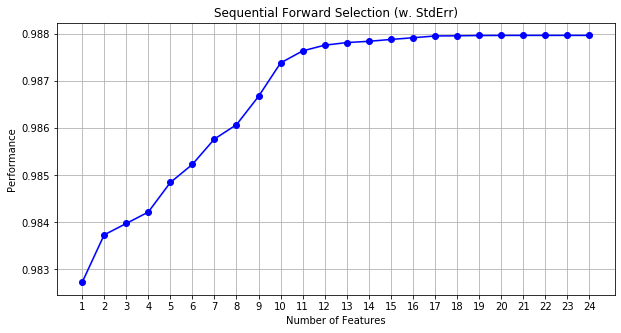

In [15]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev', figsize=(10,5))
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()